# HW3

### due on 7/20/2018 

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0)
#data.index=data.index.astype(np.datetime64)
stock = data['Close']

Populating the interactive namespace from numpy and matplotlib


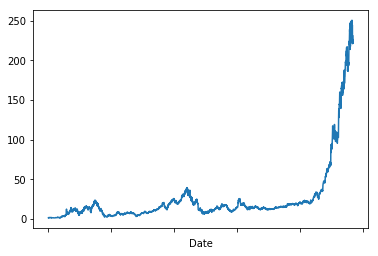

In [2]:
%pylab inline
stock.plot()

Use the Series <i>stock</i> to answer the following questions.

### Question 1


What was the closing price on Jul 2, 2012?

In [6]:
data.loc['2012-07-02','Close']

13.45

### Question 2

Find the ten largest <b>one-day % drops</b> (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. 

In [46]:
((stock.shift(-1)-stock)/stock*100).nsmallest(10)

Date
2004-08-05   -35.233519
2002-07-30   -31.750929
2008-07-02   -30.726571
2000-03-13   -26.214408
2002-11-07   -21.924392
2003-08-07   -19.689110
2008-02-13   -16.321240
2000-11-29   -16.062180
2002-06-18   -15.664775
2001-01-04   -14.971462
Name: Close, dtype: float64

### Question 3

In which days did we observe that the price has increased of at least 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where <i>d</i> is the trading session date when the increase was observed and <i>gain</i> is the maximum percentage gain (%) observed over the 9 days preceding session <i>d</i>. <i>Hint:</i> use a **rolling** minimum

In [74]:
diff=stock-stock.rolling(10).min()
increased_price=diff/stock.rolling(10).min()*100

In [76]:
increased_price[increased_price >=60]

Date
2000-02-18     77.011484
2000-02-22     64.263296
2000-02-23     61.162070
2000-03-09     73.112067
2000-03-10    103.667739
2000-03-13    157.605178
2000-03-14     90.075506
2000-03-15     82.308515
2000-03-16     60.977436
2000-03-17     70.726503
2001-01-11     60.334040
2001-10-12     69.304849
2001-10-15     68.551093
Name: Close, dtype: float64

### Question 4

What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. <i>Hint:</i> Use <b>cummax</b> or method <b>cummin</b>. **Cummax/Cummax** returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.

In [147]:
buy=stock.sort_index(ascending=False).cummin()
buy

Date
2018-04-05    221.380005
2018-04-04    221.380005
2018-04-03    221.380005
2018-04-02    221.050003
2018-03-29    221.050003
2018-03-28    221.050003
2018-03-27    221.050003
2018-03-26    221.050003
2018-03-23    221.050003
2018-03-22    221.050003
2018-03-21    221.050003
2018-03-20    221.050003
2018-03-19    221.050003
2018-03-16    221.050003
2018-03-15    221.050003
2018-03-14    221.050003
2018-03-13    221.050003
2018-03-12    221.050003
2018-03-09    221.050003
2018-03-08    221.050003
2018-03-07    221.050003
2018-03-06    221.050003
2018-03-05    221.050003
2018-03-02    221.050003
2018-03-01    221.050003
2018-02-28    221.050003
2018-02-27    221.050003
2018-02-26    221.050003
2018-02-23    221.050003
2018-02-22    221.050003
                 ...    
1999-03-05      1.364583
1999-03-04      1.364583
1999-03-03      1.364583
1999-03-02      1.364583
1999-03-01      1.364583
1999-02-26      1.364583
1999-02-25      1.364583
1999-02-24      1.364583
1999-02-23      1.36

In [151]:
x=((stock-buy)/stock).nlargest(1).index[0]
x

'2002-01-03'

In [152]:
y=stock[stock==buy[x]].index[0]
y

'2002-10-09'

In [157]:
loss=(stock[x]-stock[y])/stock[x]*100
loss

89.72249226823338